In [2]:
# import packages
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D
from keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
#dataset 
img_r,img_c=28,28
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
x_vis=x_train

if K.image_data_format()=='channels_first':
        x_train=x_train.reshape(x_train.shape[0],1,img_r,img_c)
        x_test=x_test.reshape(x_test.shape[0],1,img_r,img_c)
        input_shape=(1,img_r,img_c)
else :
    x_train=x_train.reshape(x_train.shape[0],img_r,img_c,1)
    x_test=x_test.reshape(x_test.shape[0],img_r,img_c,1)
    input_shape=(img_r,img_c,1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

(60000, 28, 28)


<function matplotlib.pyplot.show(*args, **kw)>

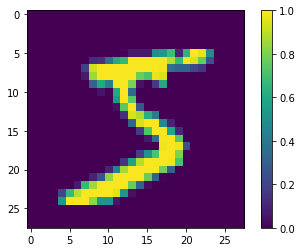

In [6]:
#visualize data
x_vis=x_vis/255.0
plt.figure()
plt.imshow(x_vis[0])
plt.colorbar()
plt.grid(False)
plt.show

In [9]:
# model1A
b_size=64
epochs=12
model=Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=adam,metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=b_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
error=model.evaluate(x_test,y_test,verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 41s 678us/step - loss: 0.1847 - acc: 0.9433 - val_loss: 0.0413 - val_acc: 0.9859
Epoch 2/12
60000/60000 [==============================] - 39s 654us/step - loss: 0.0605 - acc: 0.9813 - val_loss: 0.0300 - val_acc: 0.9894
Epoch 3/12
60000/60000 [==============================] - 38s 637us/step - loss: 0.0436 - acc: 0.9863 - val_loss: 0.0309 - val_acc: 0.9896
Epoch 4/12
60000/60000 [==============================] - 36s 598us/step - loss: 0.0365 - acc: 0.9877 - val_loss: 0.0230 - val_acc: 0.9931
Epoch 5/12
60000/60000 [==============================] - 40s 665us/step - loss: 0.0308 - acc: 0.9905 - val_loss: 0.0309 - val_acc: 0.9906
Epoch 6/12
60000/60000 [==============================] - 40s 673us/step - loss: 0.0278 - acc: 0.9911 - val_loss: 0.0286 - val_acc: 0.9917
Epoch 7/12
60000/60000 [==============================] - 40s 668us/step - loss: 0.0267 - acc: 0.9915 - val_loss: 0.

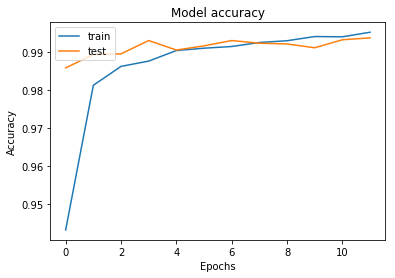

In [10]:
#accuracy and loss history visualization
#print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [6]:
print('whyy')

whyy
